# Notebook of the project of Physics of Complex Systems #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import seaborn as sns

In [2]:
# set the seed
np.random.seed(12345)

# I set some parameters for the whole project
time_steps = 1000

# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.2,
    'gamma': 0.1,   # questo sarebbe 0.01
    'lambda': 0.4,
    'nu': 0.004,
    'sigma': 0.1,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}

In [3]:
# Some utility functions
def check_sign(cell):
    # If in any cell x or y are negative, set it to zero
    if cell[0] < 0:
        cell[0] = 0
        
    if cell[1] < 0:
        cell[1] = 0

# function to add a parameter box to the 
def add_par_box(par):
    # Add a parameter box to the plot
    textstr = '\n'.join((
    r'$\alpha=%.2f$' % (par['alpha'], ),
    r'$\gamma=%.2f$' % (par['gamma'], ),
    r'$\lambda=%.2f$' % (par['lambda'], ),
    r'$\nu=%.2e$' % (par['nu'], ),
    r'$\sigma=%.2f$' % (par['sigma'], )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # place a text box in upper left in axes coords
    plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

Firstly, I try to reproduce the mean-field approach. The resulting system of ODEs is the following:
$$
    \frac{\partial x}{\partial t} = \alpha x - \gamma xy , \;\;\;
    \frac{\partial y}{\partial t} = \lambda + \nu xy - \sigma y
$$
where $x$ is the pathogen concentration and $y$ lymphocytes'. \
The parameters represent:
- $\alpha$ : proliferation rate of the pathogen; 
- $\gamma$ : destruction rate of the pathogen by the lymphocytes; 
- $\lambda$ : birth rate of the lymphocyte; 
- $\nu$ : duplication rate of the lymphocyte when encountering the pathogen; 
- $\sigma$ : death rate of the lymphocyte. 


## Mean Field Approach ##

In which regime are we? First regime:(0,y_0) unstable, (x^*,y^*) stable


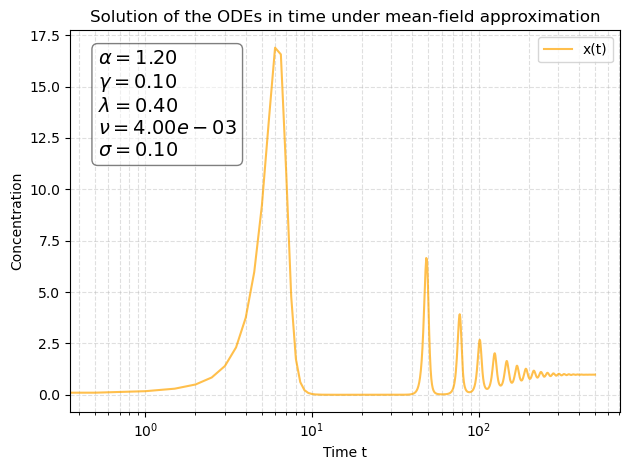

In [4]:
# set initial conditions
z0 = np.array([1,np.random.poisson(lam=1)])    # z=[x,y]

'''
# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.6,
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 0.001,
    'sigma': 0.01,
    'Dx': 0.,
    'Dy': 0.
}
'''

# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

# In which regime are we?
print(f'In which regime are we? {'First regime:(0,y_0) unstable, (x^*,y^*) stable' \
    if par['alpha']>(par['lambda']*par['gamma']/par['sigma']) else '\text{Second regime:}(0,y_0) \text{stable}, (x^*,y^*) \text{unstable}'}')

def system(z:np.ndarray ,t:np.ndarray ,par:dict):
    
    x, y = z
    dxdt = par['alpha']*x - par['gamma']*x*y
    dydt = par['lambda'] + par['nu']*x*y - par['sigma']*y
    return [dxdt,dydt]

# set the time span 
#t_s = np.linspace(0,int(1e4),int(1e5))
t_s = np.linspace(0,500,time_steps)      # credo sia questo il time step che hanno usato

# Solve
X_ode = odeint(system,z0,t_s,args=(par,))[:,0]
Y_ode = odeint(system,z0,t_s,args=(par,))[:,1]

# Normalization
X_ode = X_ode/np.mean(X_ode)
Y_ode = X_ode/np.mean(Y_ode)

# Solution of the X ODE
#plt.figure(figsize=(12,8))
plt.plot(t_s, X_ode, c='orange', label='x(t)',alpha=0.7)
plt.title('Solution of the ODEs in time under mean-field approximation')
#plt.plot(t_s,Y,c='magenta',label='y(t)',alpha=0.7)
plt.xlabel('Time t')
plt.ylabel('Concentration')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
add_par_box(par)
plt.legend()
plt.tight_layout()
plt.show()


Now I recreate the trajectory of the solutions of the ODE

In which regime are we? First regime:(0,y_0) unstable, (x^*,y^*) stable


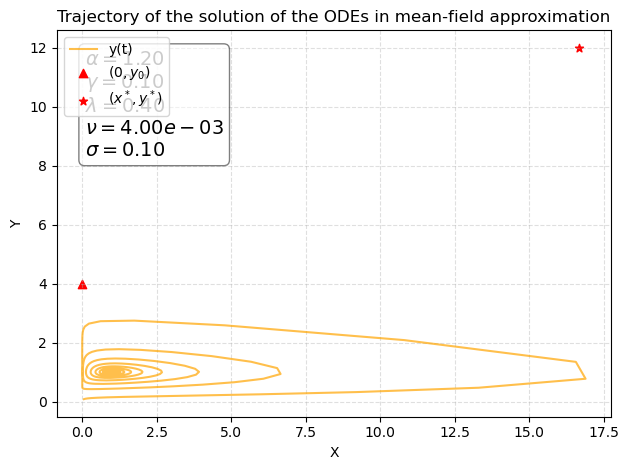

In [5]:
'''
# parameters initialization (I use the parameters listed in the caption of Figure 3)
par = {
    'alpha': 1.2,
    'gamma': 0.1,   # questo sarebbe 0.01
    'lambda': 0.4,
    'nu': 0.004,
    'sigma': 0.1,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}
'''
# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

# In which regime are we?
print(f'In which regime are we? {'First regime:(0,y_0) unstable, (x^*,y^*) stable' \
    if par['alpha']>(par['lambda']*par['gamma']/par['sigma']) else '\text{Second regime:}(0,y_0) \text{stable}, (x^*,y^*) \text{unstable}'}')

def system(z:np.ndarray ,t:np.ndarray ,par:dict):
    
    x, y = z
    dxdt = par['alpha']*x - par['gamma']*x*y
    dydt = par['lambda'] + par['nu']*x*y - par['sigma']*y
    return [dxdt,dydt]

# set the time span 
t_s = np.linspace(0,500,time_steps) 

# Solve
X_ode = odeint(system,z0,t_s,args=(par,))[:,0]
Y_ode = odeint(system,z0,t_s,args=(par,))[:,1]

# Normalization
X_ode /= np.mean(X_ode)
Y_ode /= np.mean(Y_ode)

# Normalize also the fixed points
y0 /= np.mean(Y_ode)
x_star /= np.mean(X_ode)
y_star /= np.mean(Y_ode)

# Trajectory of the solutions over time
plt.plot(X_ode, Y_ode, c='orange', label='y(t)',alpha=0.7)
plt.title('Trajectory of the solution of the ODEs in mean-field approximation')
plt.scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
plt.scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
add_par_box(par)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
#print(np.argmin(np.linalg.norm(np.array([0,y0])-np.array([X_ode,Y_ode]))))
np.argmin(np.linalg.norm(np.array([0,y0]).reshape(2, 1) - np.array([X_ode, Y_ode]), axis=0))    # questo è il modo giusto di trovare il minimo
(X_ode[924],Y_ode[924])

(0.980982224501628, 1.0057097892293072)

## Lattice ##
The interactions between pathogens and lymphocytes are described by the following reactions:
$$
\begin{gather}
    X \xrightarrow{\alpha} X + X \\
    \emptyset \xrightarrow{\lambda} Y \\
    X + Y \xrightarrow{\gamma} Y  \\
    X + Y \xrightarrow{\nu} X + 2Y \\
    Y \xrightarrow{\sigma} \emptyset .
\end{gather}
$$

### 1D ##
Firstly, I try a toy model of a 1D lattice with 100 cells and no diffusion (mean-field approximation):

In which regime are we? First regime:(0,y_0) unstable, (x^*,y^*) stable


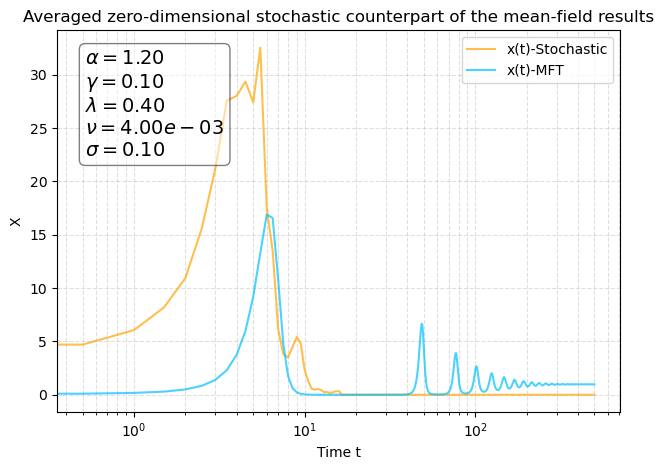

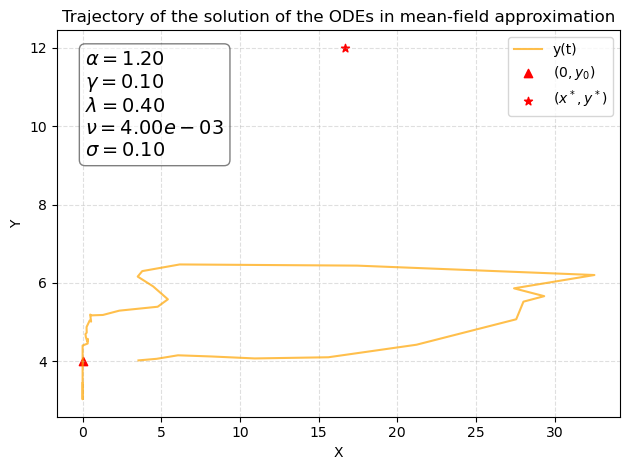

In [7]:
'''
par = {
    'alpha': 1.6,
    'gamma': 0.01,   # questo sarebbe 0.01
    'lambda': 0.6,
    'nu': 1.5e-3,
    'sigma': 0.01,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}

par = {
    'alpha': 1.2,
    'gamma': 0.1,   # questo sarebbe 0.01
    'lambda': 0.4,
    'nu': 0.004,
    'sigma': 0.1,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}
'''

# Define some meaningful quantities for the analysis
y0 = par['lambda']/par['sigma']
y_star = par['alpha']/par['gamma']
x_star = (par['sigma']-par['lambda']*par['gamma']/par['alpha'])/par['nu']

# In which regime are we?
print(f'In which regime are we? {'First regime:(0,y_0) unstable, (x^*,y^*) stable' \
    if par['alpha']>(par['lambda']*par['gamma']/par['sigma']) else '\text{Second regime:}(0,y_0) \text{stable}, (x^*,y^*) \text{unstable}'}')



def lattice1(N:int,time_steps:int,par:dict):
    # N: number of cells (default=100)
    
    # Define the lattice
    lattice = np.zeros((N,2))

    # Inizialization    (x_i,y_0) for each site, with x_i = 3, y_0 = \lambda / \sigma
    lattice[:,0] = 3    
    lattice[:,1] = par['lambda'] / par['sigma']

    # Initialize arrays to contain the mean of x and y
    X_stoc = np.zeros(time_steps)
    Y_stoc = np.zeros(time_steps)

    # Loop
    for t in range(time_steps):
        for i in range(len(lattice)):
            lattice[i,0] += np.random.poisson(par['alpha']*lattice[i,0])                # proliferation of the pathogen
            lattice[i,1] += np.random.poisson(par['lambda'])                            # birth of lymphocyte
            lattice[i,0] -= np.random.poisson(par['gamma']*lattice[i,0]*lattice[i,1])   # lymphocyte kills pathogen
            check_sign(lattice[i,:])                                                    # check the sign only after there's a subtraction
            lattice[i,1] += np.random.poisson(par['nu']*lattice[i,0]*lattice[i,1])      # lymphocyte duplication
            lattice[i,1] -= np.random.poisson(par['sigma']*lattice[i,1])
            check_sign(lattice[i,:])

            # calculate the mean of x and y, so to compare it to the mean-field result
            X_stoc[t] = np.mean(lattice[:,0])
            Y_stoc[t] = np.mean(lattice[:,1])
        
        #print(*lattice)                                                                # the asterisk in the print is used to print horizontally
    return X_stoc, Y_stoc 

# Time span
t_s = np.linspace(0,500,time_steps)

# Compute the model
X_stoc, Y_stoc = lattice1(N=100,time_steps=time_steps,par=par)

# plot the evolution of x(t)
#plt.figure(figsize=(12,8))
plt.plot(t_s, X_stoc,c='orange',label='x(t)-Stochastic',alpha=0.7)
plt.plot(t_s,X_ode,c='deepskyblue',label='x(t)-MFT',alpha=0.7)
plt.title('Averaged zero-dimensional stochastic counterpart of the mean-field results')
plt.xlabel('Time t')
plt.ylabel('X')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
# Create a box plot for the parameters in 'par'
add_par_box(par)
plt.legend()
plt.tight_layout()
plt.show()

# Provo a plottare y(x) per vedere se capisco il problema
plt.plot(X_stoc, Y_stoc, c='orange', label='y(t)',alpha=0.7)
plt.title('Trajectory of the solution of the ODEs in mean-field approximation')
plt.scatter(0,y0, c='r',marker='^',label=r'$(0,y_0)$')
plt.scatter(x_star,y_star, c='r',marker='*',label=r'$(x^*,y^*)$')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
# Create a box plot for the parameters in 'par'
add_par_box(par)
plt.legend()
plt.tight_layout()
plt.show()

Now I study the disappearance probability at the first pass near zero as a function of the distance between the two stable points.\
I only check for having zero pathogen for the zero-pathogen absorbing state; for now I don't care about Y.

3.741
3.669
3.682
3.707
3.741
3.777
3.644
3.715
3.689
3.793
3.719
3.687
3.73
3.692
3.81
3.683
3.75
3.667
3.787
3.694
3.667
3.693
3.614
3.774
3.725
3.721
3.763
3.689
3.68
3.781
3.755
3.712
3.674
3.7
3.637
3.716
3.796
3.755
3.649
3.613
3.736
3.716
3.775
3.699
3.698
3.72
3.668
3.715
3.649
3.589
3.665
3.657
3.711
3.737
3.747
3.707
3.697
3.669
3.769
3.701
3.686
3.759
3.885
3.725
3.817
3.722
3.814
3.756
3.748
3.653
3.786
3.714
3.733
3.784
3.604
3.821
3.796
3.774
3.637
3.802
3.741
3.689
3.699
3.817
3.842
3.776
3.787
3.708
3.767
3.683
3.573
3.689
3.753
3.657
3.73
3.813
3.726
3.71
3.809
3.805


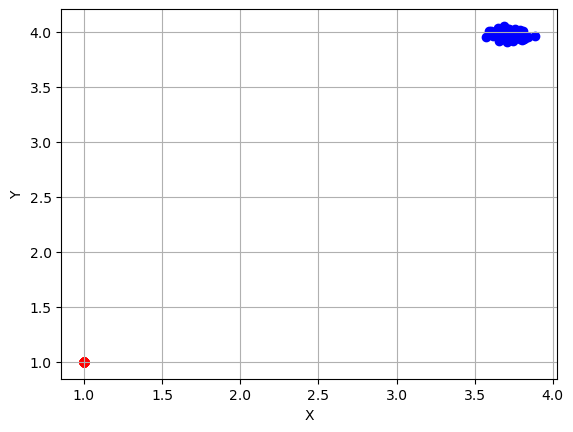

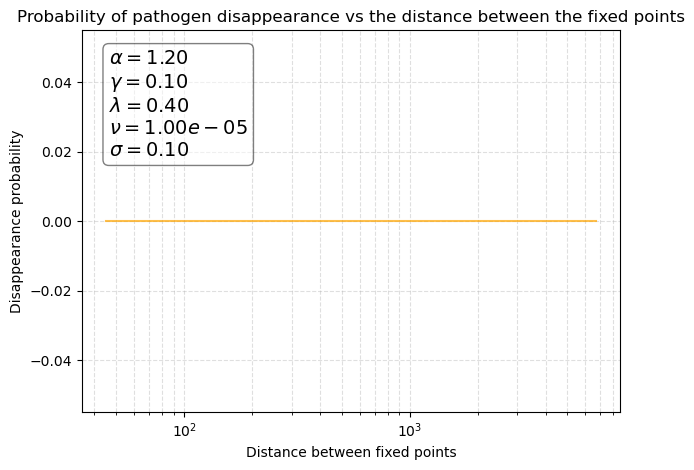

In [12]:
def P_diss(model,num_nu:int,n_iter:int,N:int,time_steps:int,par:dict):
    # Loop over nu, from 1e-5 to 1.5e-3
    nu_values = np.linspace(1e-5,1.5e-3,num_nu)[::-1]                   # I invert the array (doing [::-1] because the distance is inversly proportional to nu)

    # set the time span 
    t_s = np.linspace(0,500,time_steps) 
    
    # Initialize storing for disapperance probability
    P_d = np.zeros((num_nu,2))
    
    # Compute the distance between the two fixed points for each value of nu
    P_d[:,0] = [np.linalg.norm(np.array([0,par['lambda']/par['sigma']])-
                               np.array([(par['sigma']-par['lambda']*par['gamma']/par['alpha'])/nu,par['alpha']/par['gamma']])) 
                                for nu in nu_values]

    for i,nu in enumerate(nu_values):
        par['nu'] = nu
        for iter in range(n_iter):
            X_stoc, Y_stoc = lattice1(N=N,time_steps=time_steps,par=par)
            X_ode = odeint(system,z0,t_s,args=(par,))[:,0]
            Y_ode = odeint(system,z0,t_s,args=(par,))[:,1]
            # Define the first pass near-zero (as the point in which y(x) passes closest to (0,y0))
            t_c = np.argmin(np.linalg.norm(np.array([0,y0]).reshape(2, 1) - np.array([X_ode, Y_ode]), axis=0))
            t_cstoc = np.argmin(np.linalg.norm(np.array([0,y0]).reshape(2, 1) - np.array([X_stoc, Y_stoc]), axis=0))
            plt.scatter(X_ode[t_c],Y_ode[t_c],c='r')
            plt.scatter(X_stoc[t_cstoc],Y_stoc[t_cstoc],c='b')
            print(X_stoc[t_c])
            if np.isclose(X_stoc[t_c],0.0,1e-15):                        # I use np.isclose bc with the == always gives problems
                P_d[i,1] += 1                                          # check if pathogen dissappeared
        P_d[i,1] /= n_iter
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    return P_d

'''
par = {
    'alpha': 1.2,
    'gamma': 0.1,   # questo sarebbe 0.01
    'lambda': 0.4,
    'nu': 1e-5,
    'sigma': 0.1,
    'Dx': 0.,       # diffusion of x
    'Dy': 0.        # diffusion of y
}
'''
# Compute the disapperance probability
P_d = P_diss(model=lattice1,num_nu=10,n_iter=10,N=1000,time_steps=10,par=par)

# plot the evolution of x(t)
#plt.figure(figsize=(12,8))
plt.plot(P_d[:,0],P_d[:,1],c='orange',alpha=0.7)
plt.title('Probability of pathogen disappearance vs the distance between the fixed points')
plt.xlabel('Distance between fixed points')
plt.ylabel('Disappearance probability')
plt.xscale('log')
plt.grid(True, which="both",alpha=0.4,linestyle='--')
add_par_box(par)
plt.tight_layout()
plt.show()
